<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0], 1), "int")
    for matrix in X:
        for vector in V:
            result += np.dot(matrix, vector)
    return result

matrixes = [
    np.arange(16).reshape(4, 4),
    np.arange(16).reshape(4, 4),
    np.arange(16).reshape(4, 4),
    np.arange(16).reshape(4, 4),
    np.arange(16).reshape(4, 4),
]

vectors = [
    np.arange(4).reshape(4, 1),
    np.arange(4).reshape(4, 1),
    np.arange(4).reshape(4, 1),
]

results_for_one_x_one = np.array([[14], [38], [62], [86]])
# 1M 1V
assert np.array_equal(sum_prod(matrixes[:1], vectors[:1]), results_for_one_x_one)

# 2M 1V
assert np.array_equal(sum_prod(matrixes[:2], vectors[:1]), results_for_one_x_one * 2)

# 3M 2V
assert np.array_equal(sum_prod(matrixes[:3], vectors[:2]), results_for_one_x_one * 6)


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def binarize(M, threshold=0.5):
    result_matrix = M.copy()
    choose_matrix = result_matrix > threshold
    result_matrix[choose_matrix] = 1
    result_matrix[np.logical_not(choose_matrix)] = 0
    return result_matrix

matrix = np.arange(16).reshape(4, 4)

assert np.array_equal(binarize(matrix, 20), np.zeros_like(matrix))
assert np.array_equal(binarize(matrix, -1), np.ones_like(matrix))
assert np.array_equal(binarize(np.zeros_like(matrix), 0), np.zeros_like(matrix))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def unique_rows(mat):
    result = []
    for i in range(0, mat.shape[0]):
        result.append(list(np.unique(mat[i])))
    return result


def unique_columns(mat):
    result = []
    for i in range(0, mat.shape[1]):
        result.append(list(np.unique(mat[:, i])))
    return result


matrix = np.array([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
])

assert unique_rows(matrix) == [[1], [2], [3]]
assert unique_columns(matrix) == [[1, 2, 3], [1, 2, 3], [1, 2, 3]]

matrix_zero = np.zeros_like(matrix)

assert unique_rows(matrix_zero) == unique_columns(matrix_zero) and unique_rows(matrix_zero) == [[0], [0], [0]]

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

(array([1., 2., 3.]), array([2., 2., 2.]))

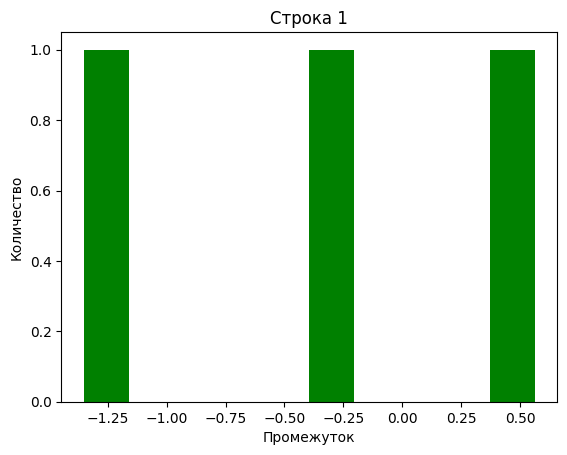

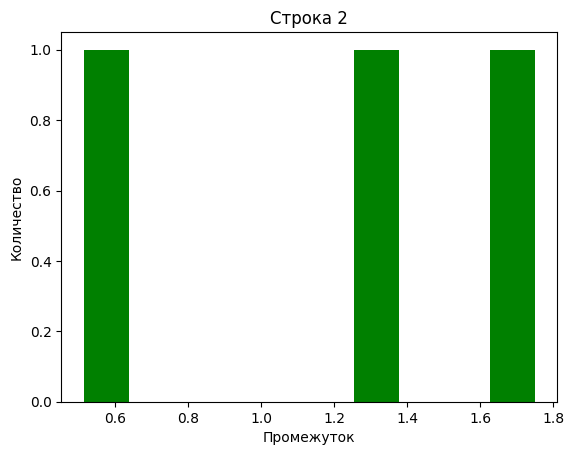

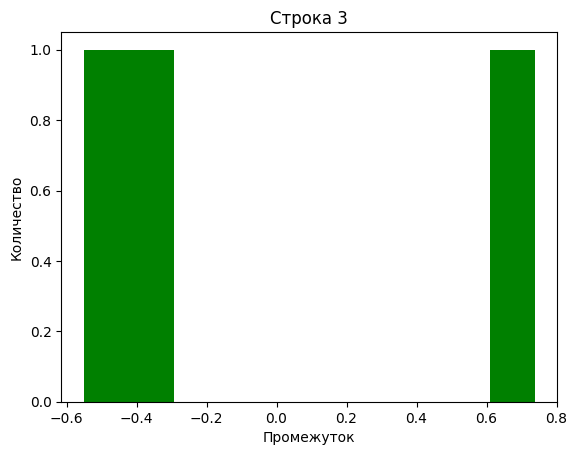

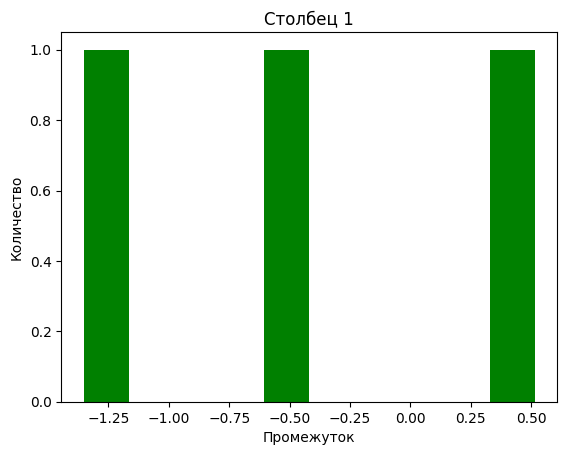

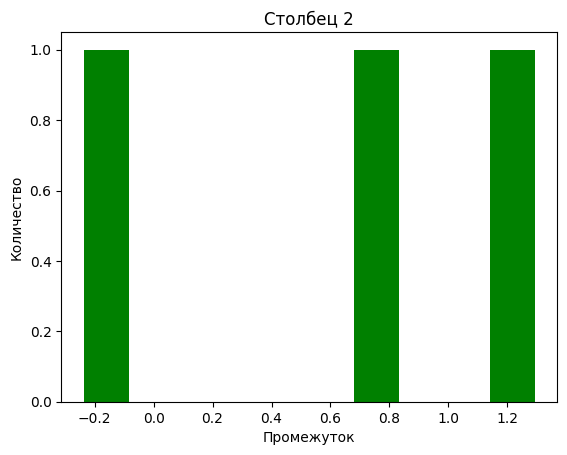

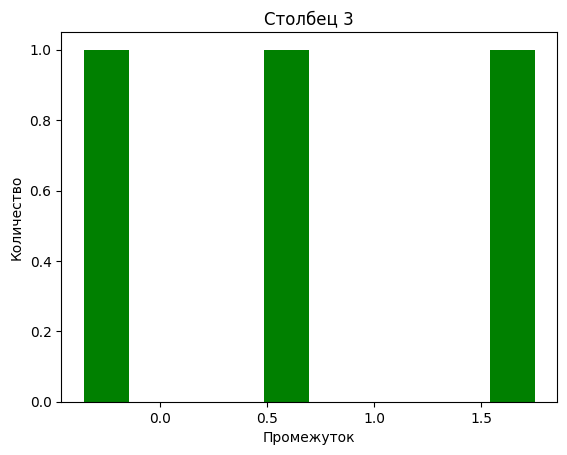

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def func(m, n):
    arr = generate_normal_random_matrix(m, n)
    for row_index in range(arr.shape[0]):
        row = arr[row_index]
        plt.figure()
        plt.hist(row, color="green")
        plt.ylabel("Количество")
        plt.xlabel("Промежуток")
        plt.title(f"Строка {row_index + 1}")

    for col_index in range(arr.shape[1]):
        col = arr.T[col_index]
        plt.figure()
        plt.hist(col, color="green")
        plt.ylabel("Количество")
        plt.xlabel("Промежуток")
        plt.title(f"Столбец {col_index + 1}")
    
    columns_means = np.mean(matrix, axis=0)
    rows_means = np.mean(matrix, axis=1)
    return rows_means, columns_means

def generate_normal_random_matrix(rows, cols):
    return np.random.normal(size=rows*cols).reshape(rows, cols)

func(3, 3)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [50]:
def chess(m, n, a, b, offset=False):
    return np.array([a if (i + offset) % 2 == 0 else b for i in range(m * n)]).reshape(m, n)


chess3x3 = [
    ['X', 'O', 'X'],
    ['O', 'X', 'O'],
    ['X', 'O', 'X']
]

chess3x3_offset = [
    ['O', 'X', 'O'],
    ['X', 'O', 'X'],
    ['O', 'X', 'O']
]

assert np.array_equal(chess(3, 3, 'X', 'O'), chess3x3)
assert np.array_equal(chess(3, 3, 'X', 'O', True), chess3x3_offset)
assert np.array_equal(chess(3, 3, 'O', 'X'), chess3x3_offset)
assert np.array_equal(chess(3, 3, 'O', 'X', True), chess3x3)

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [1]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    im, draw = get_image_draw(m, n, background_color)
    center_x = m / 2
    center_y = n / 2
    draw.rectangle((center_x  - a / 2, center_y - b / 2, center_x + a / 2, center_y + b / 2), fill=rectangle_color)
    im.show()
    
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    im, draw = get_image_draw(m, n, background_color)
    center_x = m / 2
    center_y = n / 2
    draw.ellipse((center_x  - a / 2, center_y - b / 2, center_x + a / 2, center_y + b / 2), fill=ellipse_color)
    im.show()

def get_image_draw(width, heigth, color):
    im = Image.new('RGB', (width, heigth), color)
    return im, ImageDraw.Draw(im)

draw_rectangle(200, 100, 800, 400, (255, 0, 255), (255, 255, 255))
draw_ellipse(200, 100, 800, 400, (255, 0, 255), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [2]:
import pandas as pd
import numpy as np

def get_mathematical_expectation(row):
    return np.mean(row)

def get_dispersion(row):
    return np.var(row)

def get_standard_deviation(row):
    return np.std(row)

def get_local_max(row):
    result = []
    for i in range(1, len(row) - 1):
        if row[i - 1] < row[i] and row[i + 1] < row[i]:
            result.append(row[i])
    return result

def get_local_min(row):
    result = []
    for i in range(1, len(row) - 1):
        if row[i - 1] > row[i] and row[i + 1] > row[i]:
            result.append(row[i])
    return result

def get_moving_average(row, p):
    return pd.Series(row).rolling(window=p).mean().tolist()

time_arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 5, 6, 7, 8, 7, 6, 5, 4]

print(get_mathematical_expectation(time_arr))
print(get_dispersion(time_arr))
print(get_standard_deviation(time_arr))
print(get_local_max(time_arr))
print(get_local_min(time_arr))
print(get_moving_average(time_arr, 3))

5.590909090909091
3.9690082644628095
1.9922370000737386
[9, 8]
[4]
[nan, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 8.333333333333334, 8.0, 7.0, 6.0, 5.0, 4.666666666666667, 5.0, 6.0, 7.0, 7.333333333333333, 7.0, 6.0, 5.0]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [75]:
def one_hot_encoding(arr):
    width = max(arr) + 1
    result = np.zeros((len(arr), width), dtype="int")
    for row in range(len(arr)):
        result[row, arr[row]] = 1
    return result

print(one_hot_encoding([1, 3, 4, 2, 1, 0]))


[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]
